<a href="https://colab.research.google.com/github/kylechi05/Cats-Dogs-DL/blob/main/Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /cats_and_dogs_small.zip

Streaming output truncated to the last 5000 lines.
  inflating: cats_and_dogs_small/validation/cats/cat.7001.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7002.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7003.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7004.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7005.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7006.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7007.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7008.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7009.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7010.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7011.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7012.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7013.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.7014.jpg  
  inflating: cats_and_dogs_small/validation/cats/cat.

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/cats_and_dogs_small/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    '/content/cats_and_dogs_small/validation',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 12000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


<ipython-input-4-912d68129061>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 16s 158ms/step - loss: 0.3636 - acc: 0.8419 - val_loss: 0.4440 - val_acc: 0.7919
Epoch 2/30
100/100 [==============================] - 9s 87ms/step - loss: 0.3638 - acc: 0.8369 - val_loss: 0.4469 - val_acc: 0.7900
Epoch 3/30
100/100 [==============================] - 9s 92ms/step - loss: 0.3547 - acc: 0.8438 - val_loss: 0.4231 - val_acc: 0.8000
Epoch 4/30
100/100 [==============================] - 12s 125ms/step - loss: 0.3349 - acc: 0.8556 - val_loss: 0.4078 - val_acc: 0.8175
Epoch 5/30
100/100 [==============================] - 10s 97ms/step - loss: 0.3365 - acc: 0.8487 - val_loss: 0.3870 - val_acc: 0.8288
Epoch 6/30
100/100 [==============================] - 11s 112ms/step - loss: 0.3397 - acc: 0.8534 - val_loss: 0.4613 - val_acc: 0.7881
Epoch 7/30
100/100 [==============================] - 10s 98ms/step - loss: 0.3188 - acc: 0.8637 - val_loss: 0.4100 - val_acc: 0.8225
Epoch 8/30
100/100 [==============================] - 13s 127

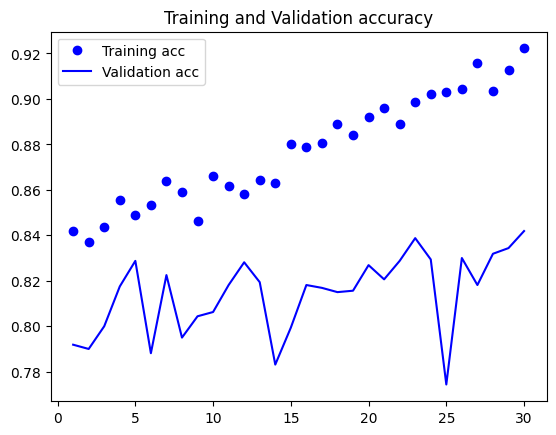

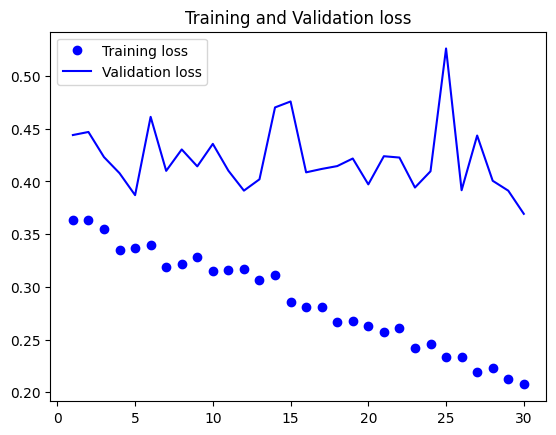

In [4]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [ ]:
#Define the model
model = Sequential()
#Add a convolution layer.
#(150,150,3)==height and width of 150 pixels and 3 color channels
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
#Within regions of 2x2, the max value is selected as output
model.add(MaxPooling2D((2, 2)))

#Add more pairs of convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

#Flattens output of previous layer into a one-dimensional vector
model.add(Flatten())

#Add fully connected layers with 512 neurons
model.add(Dense(512, activation='relu'))
#Half of the input neurons will be randomly set to 0 during each training epoch(prevents overfitting)
model.add(Dropout(0.5))

#Defines the final layer of the neural network
#This is for predicting a single output
model.add(Dense(1, activation='sigmoid'))

#Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

#Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    validation_data = validation_generator,
    validation_steps = 50,
    epochs = 10
)

#Evaluate model
model.evaluate_generator(validation_generator, steps=50)
